## Random Forest Test on GWL Timeseries in Steenkoppies A2N0612


## 1. import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from numpy import array, hstack, math
from numpy.random import uniform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
np.random.seed(42)
from sklearn.metrics import r2_score

## 2. Import data 

In [2]:
data=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0612\A2N0612.xlsx', parse_dates=['date'],  index_col='date')

In [3]:
data.head(5)

,GWL,River Discharge,Rainfall,Temperature,Groundwater usage
date,,,,,
1989-05-01,-55.14,0.379,3.021605,12.20,13.45
1989-06-01,-55.11,0.386,35.249315,9.45,13.45
1989-07-01,-55.09,0.390,0.000000,9.00,13.45
1989-08-01,-55.08,0.384,0.000000,12.85,13.45
1989-09-01,-55.25,0.361,0.000000,13.85,13.45


In [4]:
data.dtypes

GWL                  float64
River Discharge      float64
Rainfall             float64
Temperature          float64
Groundwater usage    float64
dtype: object

In [5]:
print('The shape of our features is:', data.shape)

The shape of our features is: (342, 5)


## 3. Visualise data 

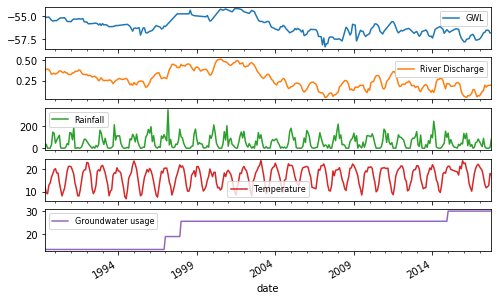

In [6]:
# Plotting
data.plot(kind='line', subplots=True,
     legend=False)

[ax.legend(loc="best", prop={'size': 8}) for ax in plt.gcf().axes]
plt.gcf().set_size_inches(8,5)

##  Split data: Train, test, val split 50%, 10%,10% 

change values here 

In [7]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain5 = data['GWL'].iloc[:171]
Xtrain5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:171, :]

ytest5 = data['GWL'].iloc[171:206]
Xtest5  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[171:206, :]

yval5  = data['GWL'].iloc[206:240]
Xval5 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

In [8]:
print(ytrain5.shape,Xtrain5.shape,  
      ytest5.shape,Xtest5.shape, 
      yval5.shape,Xval5.shape)

(171,) (171, 4) (35,) (35, 4) (34,) (34, 4)


##  Call model

In [9]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf5 = RandomForestRegressor(random_state = 42)
                            #bootstrap='true',
 #max_depth=None, max_features='sqrt', min_samples_leaf=5,min_samples_split=2,
# n_estimators=20)



## 6. Train the model on training data

In [10]:
rf5.fit(Xtrain5, ytrain5)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## 6.1 Plot tests results 

In [11]:
training5= rf5.predict(Xtrain5)
training5 = pd.Series(training5, index=ytrain5.index)

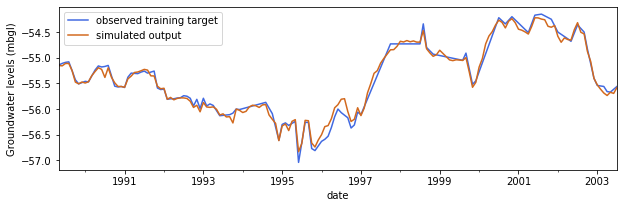

In [12]:
#plot test data 
ytrain5.plot(label='observed training target', color='royalblue')
training5.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [13]:
actual_train5 =np.array(ytrain5)
simulated_train5 =np.array(training5)
 
dftrain5= pd.DataFrame({'actual_train5': actual_train5, 'simulated_train5': list(simulated_train5)}, columns=['actual_train5', 'simulated_train5'])

In [14]:
dftrain5

,actual_train5,simulated_train5
0,-55.140,-55.152233
1,-55.110,-55.157967
2,-55.090,-55.111600
3,-55.080,-55.111700
4,-55.250,-55.251600
...,...,...
166,-55.560,-55.687550
167,-55.660,-55.736117
168,-55.670,-55.673310
169,-55.615,-55.695400


## 6.3 Performace metrics training

In [15]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train5 = dftrain5['actual_train5']
simulated_train5 = dftrain5['simulated_train5']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train5, simulated_train5))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train5, simulated_train5)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train5-simulated_train5)**2)/sum((simulated_train5-np.mean(simulated_train5))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



Root Mean Squared Error: 0.08381880652828054
r2_score: 0.9850861022010822
Nash Sutcliffe efficiency coefficient: 0.983932880145803


## 7. Hyperparameter tuning on validation data set 

In [16]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': [None,500],
    'max_features': ["auto", "log2", None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100],
    'criterion':['mse', 'mae'],
    'max_features':['auto', 'sqrt', 'log2'], 
    'bootstrap':[True,False],'random_state':[42]
}




from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [17]:
clf5 = RandomForestRegressor()
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model5 = GridSearchCV(estimator = clf5, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model5.fit(Xval5,yval5)

#predictionforest = model.best_estimator_.predict(X_Test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    5.7s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_e...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': 

In [18]:
model5.best_params_


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [19]:
trainforest5= model5.best_estimator_.fit(Xtrain5, ytrain5)


## Predict with new parameter

In [20]:
predictionforest5= model5.best_estimator_.predict(Xtest5)

In [21]:
prediction5 = pd.Series(predictionforest5, index=ytest5.index)

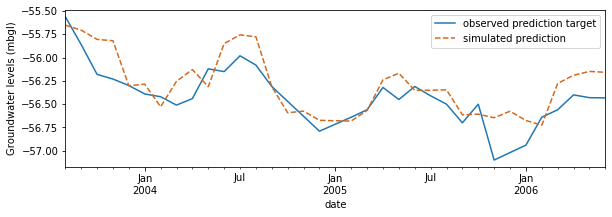

In [22]:
ytest5.plot(label='observed prediction target')
prediction5.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [23]:
actual_test5 =np.array(ytest5)
simulated_test5 =np.array(prediction5)

dataset_val = pd.DataFrame({'actual_test5': actual_test5, 'simulated_test5': list(simulated_test5)}, columns=['actual_test5', 'simulated_test5'])

In [24]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test5']
simulated_val = dataset_val['simulated_test5']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


Root Mean Squared Error: 0.2222611930795039
r2_score: 0.47056224459321094
Nash Sutcliffe efficiency coefficient: 0.5153926316788485


## Plotting test and train together 

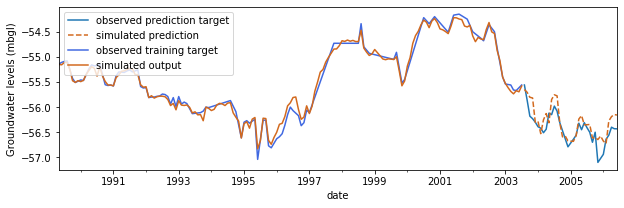

In [25]:

ytest5.plot(label='observed prediction target')
prediction5.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain5.plot(label='observed training target', color='royalblue')
training5.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')


plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## Feature importance 

In [26]:
# how many estimators?
len(rf5.estimators_)


100

In [27]:
#Feature importance
rf5.estimators_[0].feature_importances_

array([0.02160316, 0.04850554, 0.89964288, 0.03024842])

In [28]:
feature_list=['Rainfall','Temperature','Discarge','Licenced Abstraction']
# Get numerical feature importances
importances = list(rf5.estimators_[0].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall             Importance: 0.02
Variable: Temperature          Importance: 0.05
Variable: Discarge             Importance: 0.9
Variable: Licenced Abstraction Importance: 0.03


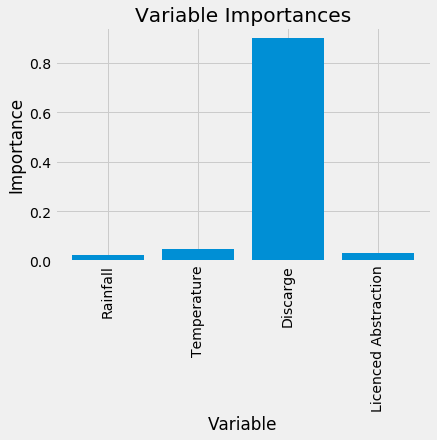

In [29]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## train test validation split 60%

change values here 

In [30]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain6 = data['GWL'].iloc[:206]
Xtrain6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:206, :]

ytest6 = data['GWL'].iloc[206:240]
Xtest6  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[206:240, :]

yval6  = data['GWL'].iloc[240:274]
Xval6 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

In [31]:
print(ytrain6.shape,Xtrain6.shape,  
      ytest6.shape,Xtest6.shape, 
      yval6.shape,Xval6.shape)

(206,) (206, 4) (34,) (34, 4) (34,) (34, 4)


## 5. Call model

In [32]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf6 = RandomForestRegressor(random_state = 42)
                            #bootstrap='true',
 #max_depth=None, max_features='sqrt', min_samples_leaf=5,min_samples_split=2,
# n_estimators=20)



## 6. Train the model on training data

In [33]:
rf6.fit(Xtrain6, ytrain6)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## 6.1 Plot tests results 

In [34]:
training6= rf6.predict(Xtrain6)
training6 = pd.Series(training6, index=ytrain6.index)

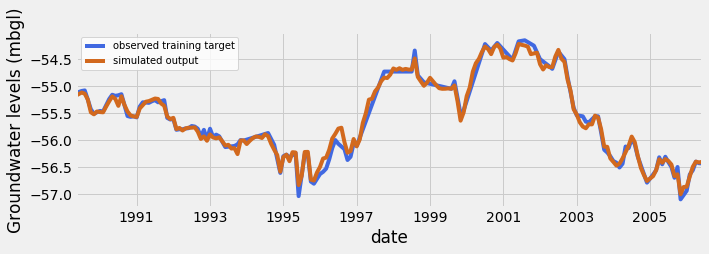

In [35]:
#plot test data 
ytrain6.plot(label='observed training target', color='royalblue')
training6.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.rcParams.update(plt.rcParamsDefault)

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [36]:
actual_train6=np.array(ytrain6)
simulated_train6 =np.array(training6)
 
dftrain6= pd.DataFrame({'actual_train6': actual_train6, 'simulated_train6': list(simulated_train6)}, columns=['actual_train6', 'simulated_train6'])

In [37]:
dftrain6

,actual_train6,simulated_train6
0,-55.1400,-55.179233
1,-55.1100,-55.148767
2,-55.0900,-55.118633
3,-55.0800,-55.140517
4,-55.2500,-55.247650
...,...,...
201,-56.6400,-56.676300
202,-56.5600,-56.496400
203,-56.4000,-56.400800
204,-56.4300,-56.415367


## 6.3 Performace metrics training

In [38]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train6 = dftrain6['actual_train6']
simulated_train6 = dftrain6['simulated_train6']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train6, simulated_train6))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train6, simulated_train6)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train6-simulated_train6)**2)/sum((simulated_train6-np.mean(simulated_train6))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



Root Mean Squared Error: 0.08323490808031894
r2_score: 0.9876256700521524
Nash Sutcliffe efficiency coefficient: 0.9868027501750939


## 7. Hyperparameter tuning on validation data set 

In [39]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': [None,500],
    'max_features': ["auto", "log2", None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100],
    'criterion':['mse', 'mae'],
    'max_features':['auto', 'sqrt', 'log2'], 
    'bootstrap':[True,False],'random_state':[42]
}




from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [40]:
clf6 = RandomForestRegressor()
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model6 = GridSearchCV(estimator = clf6, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model6.fit(Xval6,yval6)

#predictionforest = model.best_estimator_.predict(X_Test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.5s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_e...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': 

In [41]:
model6.best_params_


{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [42]:
trainforest6= model6.best_estimator_.fit(Xtrain6, ytrain6)


## Predict with new parameter

In [43]:
predictionforest6= model6.best_estimator_.predict(Xtest6)

In [44]:
prediction6 = pd.Series(predictionforest6, index=ytest6.index)

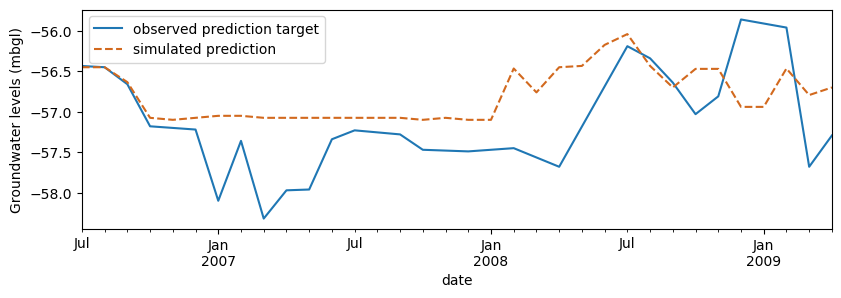

In [45]:
ytest6.plot(label='observed prediction target')
prediction6.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [46]:
actual_test6 =np.array(ytest6)
simulated_test6 =np.array(prediction6)

dataset_val = pd.DataFrame({'actual_test6': actual_test6, 'simulated_test6': list(simulated_test6)}, columns=['actual_test6', 'simulated_test6'])

In [47]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test6']
simulated_val = dataset_val['simulated_test6']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


Root Mean Squared Error: 0.6224063469790192
r2_score: -0.011924023608724132
Nash Sutcliffe efficiency coefficient: -2.902822141535336


## Plotting test and train together 

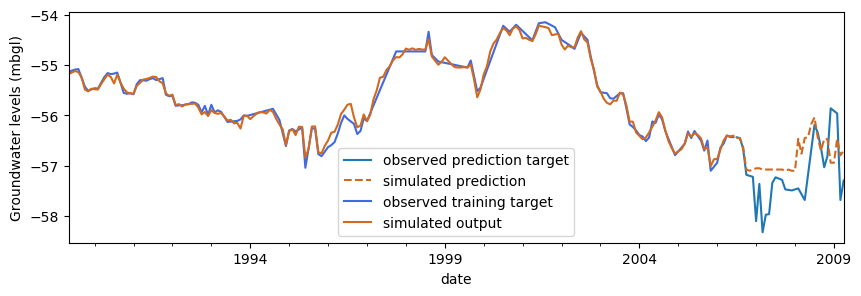

In [48]:

ytest6.plot(label='observed prediction target')
prediction6.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain6.plot(label='observed training target', color='royalblue')
training6.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## Feature importance 

In [49]:
# how many estimators?
len(rf6.estimators_)


100

In [50]:
#Feature importance
rf6.estimators_[0].feature_importances_

array([0.01334165, 0.02554173, 0.95205945, 0.00905717])

In [51]:
feature_list=['Rainfall','Temperature','Discarge','Licenced Abstraction']
# Get numerical feature importances
importances = list(rf6.estimators_[0].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall             Importance: 0.01
Variable: Temperature          Importance: 0.03
Variable: Discarge             Importance: 0.95
Variable: Licenced Abstraction Importance: 0.01


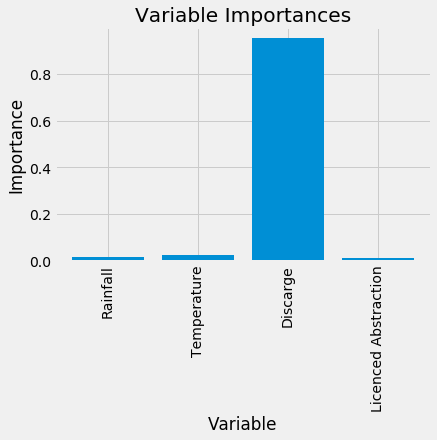

In [52]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## train test validation split 70%

change values here 

In [53]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain7 = data['GWL'].iloc[:240]
Xtrain7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:240, :]

ytest7 = data['GWL'].iloc[240:274]
Xtest7  = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[240:274, :]

yval7  = data['GWL'].iloc[274:308]
Xval7 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[274:308, :]

In [54]:
print(ytrain7.shape,Xtrain7.shape,  
      ytest7.shape,Xtest7.shape, 
      yval7.shape,Xval7.shape)

(240,) (240, 4) (34,) (34, 4) (34,) (34, 4)


## 5. Call model

In [55]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf7 = RandomForestRegressor(random_state = 42)
                            #bootstrap='true',
 #max_depth=None, max_features='sqrt', min_samples_leaf=5,min_samples_split=2,
# n_estimators=20)



## 6. Train the model on training data

In [56]:
rf7.fit(Xtrain7, ytrain7)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## 6.1 Plot tests results 

In [57]:
training7= rf7.predict(Xtrain7)
training7 = pd.Series(training7, index=ytrain7.index)

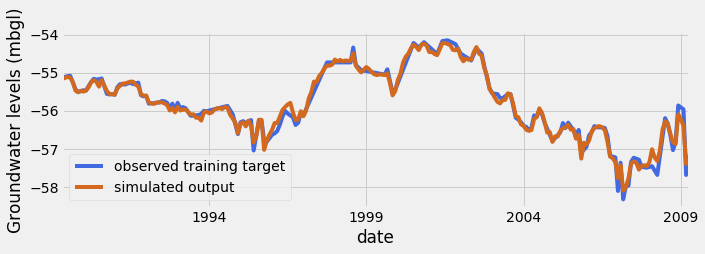

In [58]:
#plot test data 
ytrain7.plot(label='observed training target', color='royalblue')
training7.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [59]:
actual_train7=np.array(ytrain7)
simulated_train7 =np.array(training7)
 
dftrain7= pd.DataFrame({'actual_train7': actual_train7, 'simulated_train7': list(simulated_train7)}, columns=['actual_train7', 'simulated_train7'])

In [60]:
dftrain7

,actual_train7,simulated_train7
0,-55.140000,-55.163367
1,-55.110000,-55.135383
2,-55.090000,-55.111200
3,-55.080000,-55.131083
4,-55.250000,-55.244100
...,...,...
235,-55.860000,-56.090600
236,-55.910000,-56.217600
237,-55.960000,-56.396400
238,-57.680000,-57.391600


## 6.3 Performace metrics training

In [61]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train7 = dftrain7['actual_train7']
simulated_train7 = dftrain7['simulated_train7']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train7, simulated_train7))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train7, simulated_train7)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train7-simulated_train7)**2)/sum((simulated_train7-np.mean(simulated_train7))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



Root Mean Squared Error: 0.11029807382615914
r2_score: 0.9853328368124302
Nash Sutcliffe efficiency coefficient: 0.9844971692023463


## 7. Hyperparameter tuning on validation data set 

In [62]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': [None,500],
    'max_features': ["auto", "log2", None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100],
    'criterion':['mse', 'mae'],
    'max_features':['auto', 'sqrt', 'log2'], 
    'bootstrap':[True,False],'random_state':[42]
}




from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [63]:
clf7 = RandomForestRegressor()
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model7 = GridSearchCV(estimator = clf7, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model7.fit(Xval7,yval7)

#predictionforest = model.best_estimator_.predict(X_Test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    4.3s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_e...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': 

In [64]:
model6.best_params_


{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [65]:
trainforest7= model7.best_estimator_.fit(Xtrain7, ytrain7)


## Predict with new parameter

In [66]:
predictionforest7= model7.best_estimator_.predict(Xtest7)

In [67]:
prediction7 = pd.Series(predictionforest7, index=ytest7.index)

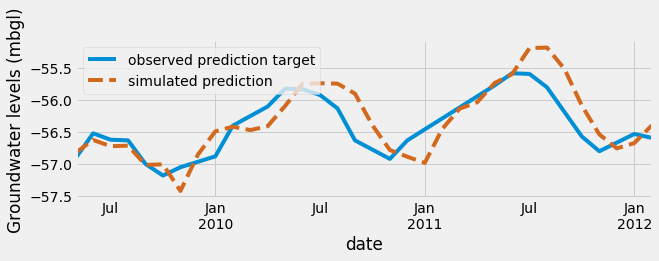

In [68]:
ytest7.plot(label='observed prediction target')
prediction7.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [69]:
actual_test7=np.array(ytest7)
simulated_test7=np.array(prediction7)

dataset_val = pd.DataFrame({'actual_test7': actual_test7, 'simulated_test7': list(simulated_test7)}, columns=['actual_test7', 'simulated_test7'])

In [70]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test7']
simulated_val = dataset_val['simulated_test7']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


Root Mean Squared Error: 0.3081328141963492
r2_score: 0.5147759430226854
Nash Sutcliffe efficiency coefficient: 0.6788890022138623


## Plotting test and train together 

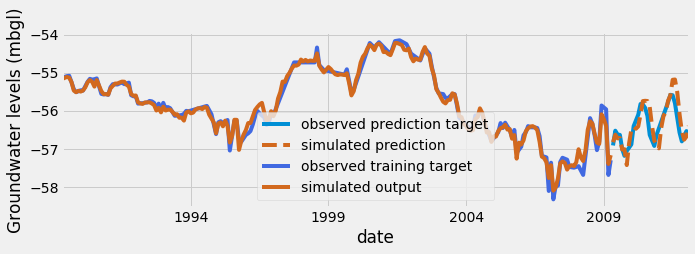

In [71]:

ytest7.plot(label='observed prediction target')
prediction7.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain7.plot(label='observed training target', color='royalblue')
training7.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## Feature importance 

In [72]:
# how many estimators?
len(rf7.estimators_)


100

In [73]:
#Feature importance
rf7.estimators_[0].feature_importances_

array([0.02666921, 0.02230415, 0.94436024, 0.00666641])

In [74]:
feature_list=['Rainfall','Temperature','Discarge','Licenced Abstraction']
# Get numerical feature importances
importances = list(rf7.estimators_[0].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall             Importance: 0.03
Variable: Temperature          Importance: 0.02
Variable: Discarge             Importance: 0.94
Variable: Licenced Abstraction Importance: 0.01


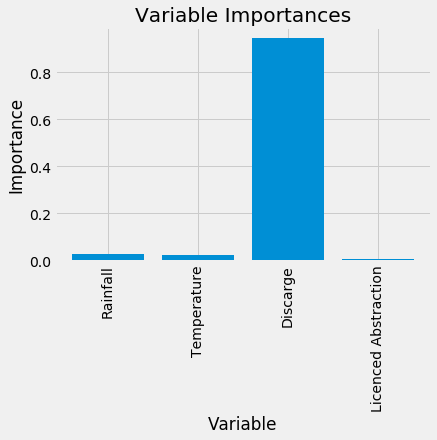

In [75]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 4. Split data: Train, test, val split 80%, 10%,10% 

change values here 

In [76]:
#'GWL','Rainfall','Temperature','River Discharge','Groundwater usage'

ytrain8= data['GWL'].iloc[:275]
Xtrain8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[:275, :]

ytest8 = data['GWL'].iloc[275:309]
Xtest8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[275:309, :]

yval8= data['GWL'].iloc[309:343]
Xval8 = data.loc[:, ['Rainfall','Temperature','River Discharge','Groundwater usage'
]].iloc[309:343, :]

In [77]:
print(ytrain8.shape,Xtrain8.shape,  
      ytest8.shape,Xtest8.shape, 
      yval8.shape,Xval8.shape)

(275,) (275, 4) (34,) (34, 4) (33,) (33, 4)


## 5. Call model

In [78]:

#random.seed(1234)
from sklearn.ensemble import RandomForestRegressor
from numpy import *

random.seed(42)
rf8 = RandomForestRegressor(random_state = 42)
                            #bootstrap='true',
 #max_depth=None, max_features='sqrt', min_samples_leaf=5,min_samples_split=2,
# n_estimators=20)



## 6. Train the model on training data

In [79]:
rf8.fit(Xtrain8, ytrain8)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## 6.1 Plot tests results 

In [80]:
training8= rf8.predict(Xtrain8)
training8= pd.Series(training8, index=ytrain8.index)

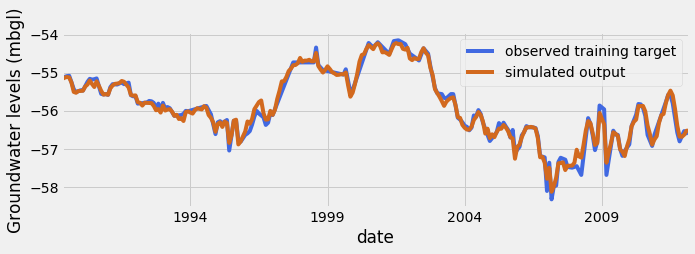

In [81]:
#plot test data 
ytrain8.plot(label='observed training target', color='royalblue')
training8.plot(label='simulated output', color='chocolate')
#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = 'best')

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train')

## 6.2 Create data frame from training observed and simulated data

In [82]:
actual_train8 =np.array(ytrain8)
simulated_train8 =np.array(training8)
 
dftrain8= pd.DataFrame({'actual_train8': actual_train8, 'simulated_train8': list(simulated_train8)}, columns=['actual_train8', 'simulated_train8'])

In [83]:
dftrain8

,actual_train8,simulated_train8
0,-55.140,-55.161900
1,-55.110,-55.130900
2,-55.090,-55.111433
3,-55.080,-55.124983
4,-55.250,-55.256218
...,...,...
270,-56.800,-56.674660
271,-56.665,-56.679627
272,-56.530,-56.626550
273,-56.590,-56.521650


## 6.3 Performace metrics training

In [84]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_train5 = dftrain8['actual_train8']
simulated_train5 = dftrain8['simulated_train8']

#MAE=metrics.mean_absolute_error (actual_train, simulated_train)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_train, simulated_train)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_train5, simulated_train5))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual_train5-simulated_train5)/actual_train5)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_train5, simulated_train5)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_train5-simulated_train5)**2)/sum((simulated_train5-np.mean(simulated_train5))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)



Root Mean Squared Error: 0.1143340235676859
r2_score: 0.9834987463432819
Nash Sutcliffe efficiency coefficient: 0.9825193918461848


## 7. Hyperparameter tuning on validation data set 

In [85]:
param_search = {
    'bootstrap': [True, False],
    'max_depth': [None,500],
    'max_features': ["auto", "log2", None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100],
    'criterion':['mse', 'mae'],
    'max_features':['auto', 'sqrt', 'log2'], 
    'bootstrap':[True,False],'random_state':[42]
}




from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=rf5, cv=tscv,
                        param_grid=param_search)
gsearch.fit(Xval5, yval5.ravel())

gsearch.best_params_

In [86]:
clf8 = RandomForestRegressor()
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
tscv = TimeSeriesSplit(n_splits=3)

model8 = GridSearchCV(estimator = clf8, param_grid = param_search, 
                               cv = tscv, verbose= 5, n_jobs = -1)
model8.fit(Xval8,yval8)

#predictionforest = model.best_estimator_.predict(X_Test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:    2.4s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_e...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': 

In [87]:
model8.best_params_


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [88]:
trainforest8= model8.best_estimator_.fit(Xtrain8, ytrain8)


## Predict with new parameter

In [89]:
predictionforest8= model8.best_estimator_.predict(Xtest8)

In [90]:
prediction8 = pd.Series(predictionforest8, index=ytest8.index)

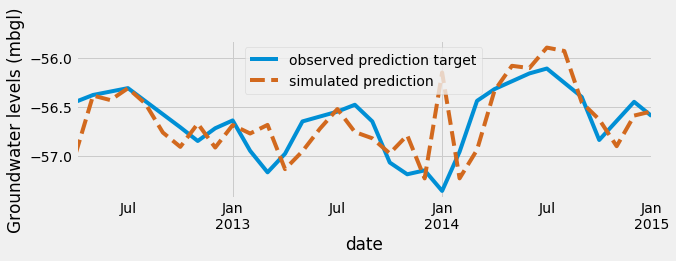

In [91]:
ytest8.plot(label='observed prediction target')
prediction8.plot(label='simulated prediction', color='chocolate',linestyle='dashed')
#plt.suptitle(' GWL Timeseries Prediction for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().subplots_adjust(left=0.15,bottom=0.15)
plt.legend(loc = 'best')

plt.gcf().set_size_inches(10,3)

#plt.savefig(r'C:\Users\Kirsty\Desktop\Sprediction')

## Create a data frame on test ovserved and simulated 

In [92]:
actual_test8 =np.array(ytest8)
simulated_test8 =np.array(prediction8)

dataset_val = pd.DataFrame({'actual_test8': actual_test8, 'simulated_test8': list(simulated_test8)}, columns=['actual_test8', 'simulated_test8'])

In [93]:
# Performance metrics training 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
import math
import numpy as np
actual_val = dataset_val['actual_test8']
simulated_val = dataset_val['simulated_test8']

#MAE=metrics.mean_absolute_error (actual_val, simulated_val)
#print('Mean Absolute Error:', MAE)

#MedianAE=metrics.mean_squared_error (actual_val, simulated_val)
#print('Mean Squared Error:', MedianAE)

RMSE=np.sqrt(metrics.mean_squared_error(actual_val, simulated_val))
print ('Root Mean Squared Error:',RMSE)

#RMSEr=np.sqrt(sum((actual-simulated)/actual)**2)/300
#print('Relative Root Mean Squared Error:',RMSEr)

r2_score=metrics.r2_score(actual_val, simulated_val)
print('r2_score:', r2_score)


#Nash Sutcliffe efficiency coefficient
NSE= 1 - sum((actual_val-simulated_val)**2)/sum((simulated_val-np.mean(simulated_val))**2)
print('Nash Sutcliffe efficiency coefficient:', NSE)


Root Mean Squared Error: 0.3078142300795649
r2_score: 0.05009161011220453
Nash Sutcliffe efficiency coefficient: 0.19295972911125236


## Plotting test and train together 

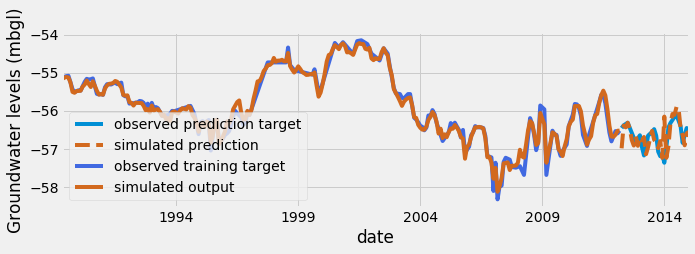

In [94]:

ytest8.plot(label='observed prediction target')
prediction8.plot(label='simulated prediction', color='chocolate',linestyle='dashed')

ytrain8.plot(label='observed training target', color='royalblue')
training8.plot(label='simulated output', color='chocolate')

#plt.suptitle(' GWL Timeseries for Well A2N0553')
plt.xlabel('date')
plt.ylabel('Groundwater levels (mbgl)')

plt.gcf().set_size_inches(10,3)

plt.legend(loc = "best")

#plt.savefig(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\1. GWL background decline\A2N0617\together_rainfall A2N0617 _train'

## Feature importance 

In [95]:
# how many estimators?
len(rf8.estimators_)


100

In [96]:
#Feature importance
rf8.estimators_[0].feature_importances_

array([0.01830211, 0.03290331, 0.92171242, 0.02708216])

In [97]:
feature_list=['Rainfall','Temperature','Discarge','Licenced Abstraction']
# Get numerical feature importances
importances = list(rf8.estimators_[0].feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall             Importance: 0.02
Variable: Temperature          Importance: 0.03
Variable: Discarge             Importance: 0.92
Variable: Licenced Abstraction Importance: 0.03


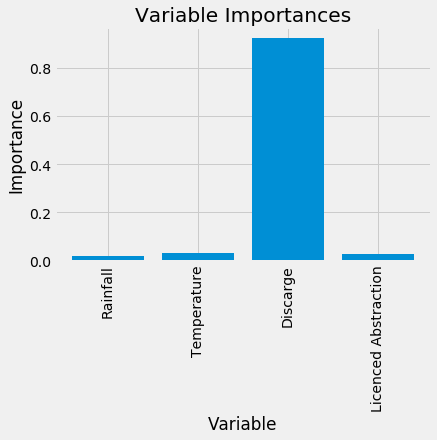

In [98]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');